In [27]:
import os
import glob
import rosbag
import pandas as pd
import numpy as np
import cv2
import time 

from os import path
import matplotlib.pyplot as plt
from utils.visualisation import *
from utils.postprocessing.utils import csvs2dfs
from functools import reduce
from utils.postprocessing.config import Config

import seaborn as sns

In [7]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Visualize the simulation
Visualize the robot's simulation on a specific map is tremendously to understand if everything went perfect. Also, we can have an idea about the generated dataset.

In [23]:
MAP_NAME = 'bars1'
MAPS_DIR = '/home/francesco/Desktop/carino/vaevictis/data/train/maps/'

In [24]:
csvs_paths = glob.glob('/home/francesco/Desktop/carino/vaevictis/data/train/csvs/{}/*.csv'.format(MAP_NAME))
# csvs_paths = glob.glob('/home/francesco/Desktop/data/csv/querry/*.csv')
len(csvs_paths)

95

<IPython.core.display.Javascript object>


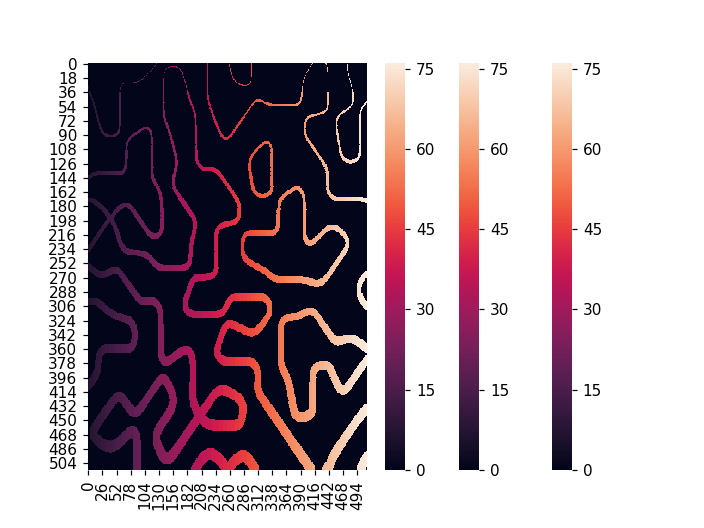

In [28]:
hm = cv2.imread('{}/{}.png'.format(MAPS_DIR, MAP_NAME))
hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)

sns.heatmap(hm)

## Visualize the robot's trace
Below we plotted all the robot's positions for the given map

In [30]:
dfs = csvs2dfs(csvs_paths)

In [7]:
plt.rcParams['figure.figsize'] = (6,6)

<IPython.core.display.Javascript object>


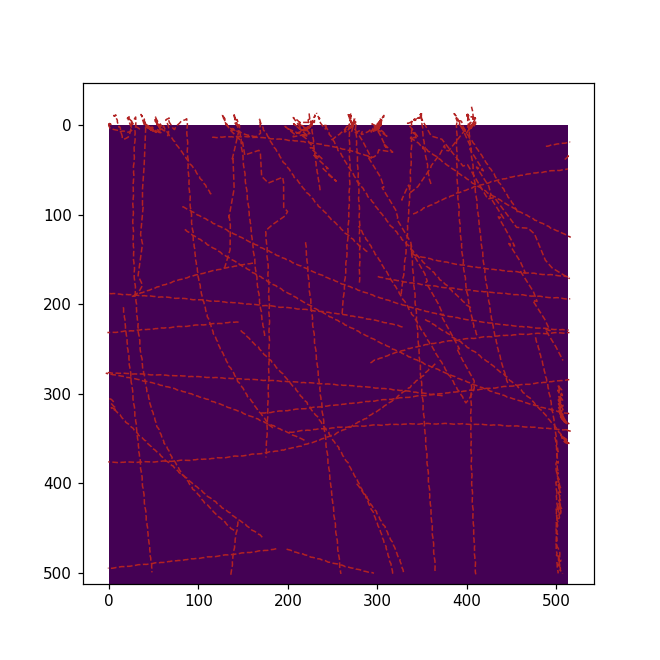

<IPython.core.display.Javascript object>


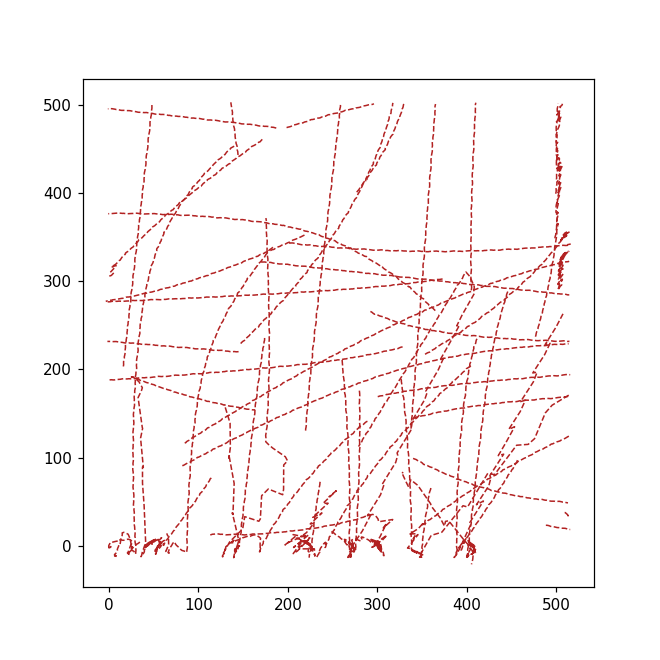

In [8]:
show_traces(dfs, hm)
show_naked_traces(dfs)

## Plotting statistics

In [9]:
df_total = pd.concat(filter(lambda x: len(x) > 0, dfs))
df_total = df_total.dropna()
df_total = df_total.reset_index() # we need to reset the index otherwise the plots are based on the old overlapping indexes

### Advancement
Below we show a box plot of the advancement

<IPython.core.display.Javascript object>


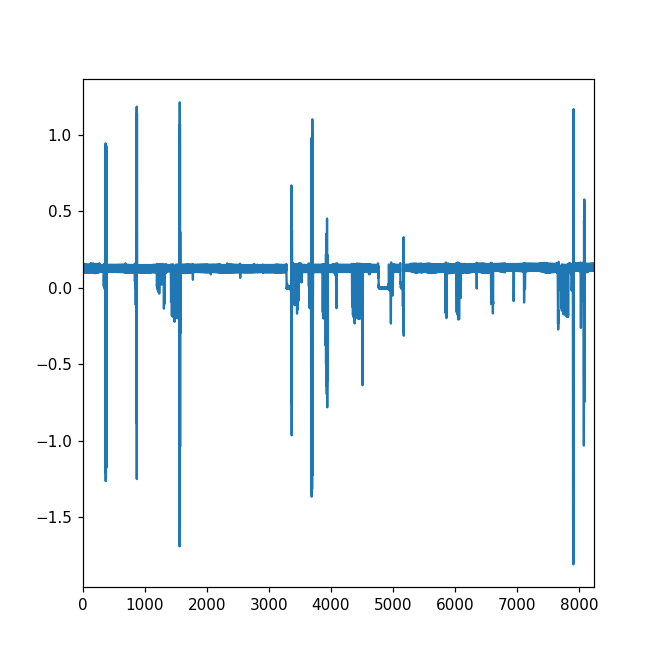

In [10]:
fig = plt.figure()
df_total['advancement'].plot.line()

<IPython.core.display.Javascript object>


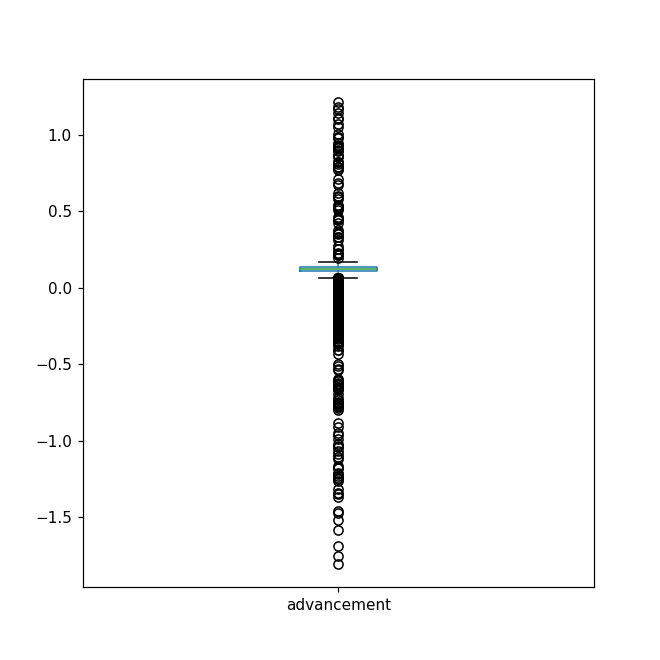

0.10211069427883278

In [11]:
fig = plt.figure()
df_total['advancement'].plot.box()
df_total['advancement'].mean()

In [12]:
df_total['advancement'].min()

-1.8061398462474407

# Debug

In [100]:
from utils.visualisation import *
from utils.postprocessing.utils import *

In [1]:
CSV_PATH = '//home/francesco/Desktop/carino/vaevictis/data/train/csvs/bars1/1549460964.724664.csv/'

In [197]:
class DebugPipeline():
    def __init__(self, hm):
        self.hm = hm
    
    @property
    def hm_ax(self):
        fig = plt.figure()
        plt.title('Map')
        ax = sns.heatmap(hm)
        return ax 
    
    def show_map(self, hm):
        self.hm_ax
        plt.show()
    
    def show_trace(self, df):
        initial_pos = df.hm_x[0], df.hm_y[0]
        last_position = df.hm_x.iloc[-1], df.hm_y.iloc[-1]
        print(last_position)
        ax = self.hm_ax
        ax.plot(*initial_pos, marker='o', color='g', ls='', label='start')
        ax.plot(*last_position, marker='o', color='r', ls='', label='finish')
        ax.plot(df.hm_x,  df.hm_y, '--', linewidth=2, color='white', label='path')
        ax.legend()
    
    def show_patches(self, df, center=False):
        n_samples = 4
        sample = df.sample(n_samples)
        fig, ax = plt.subplots(nrows=n_samples // 2, ncols=n_samples // 2)
        plt.title('patches')
        for row in ax:
            for idx, (col, (i, row)) in enumerate(zip(row, sample.iterrows())):
                x, y = row["hm_x"],row["hm_y"]
                patch, _ = hmpatch(self.hm, x, y,np.rad2deg(row['pose__pose_position_z']), 100,scale=1)
                print(patch[patch.shape[0] // 2, patch.shape[1] // 2])
                if center: patch = patch - patch[patch.shape[0] // 2, patch.shape[1] // 2]
                patch = (patch * 255)
                    
                col.plot(50, 50, marker='o', color='r', ls='', linewidth=10, label='finish')                
                sns.heatmap(patch, ax=col)

        plt.show()
        
        
        
    def show_patch_on_the_map(self, sample):
        fig = plt.figure()

        x, y, ang, ad = sample["hm_x"], \
            sample["hm_y"], \
            sample['pose__pose_position_z'], \
            sample["advancement"]

        ax1 = plt.subplot(2, 1, 1)
        ax2 = plt.subplot(2, 1, 2)
        
        ax1.set_title("advancement: {:.4f}, x={:.0f}, y={:.0f}".format(ad, 
                                                                      x,
                                                                      y))
        sns.heatmap(self.hm, ax=ax1)
        rect = patches.Rectangle((x - 50,y - 50), 100, 100, linewidth=1, edgecolor='r', facecolor='none')
        ax1.add_patch(rect)
    
        patch, _ = hmpatch(self.hm, x, y,np.rad2deg(ang), 100,scale=1)
        sns.heatmap(patch, ax=ax2)
        
        
    def show_patches_on_the_map(self, df):
        n_show = 3
        subset = df.loc[list(range(0, len(df), len(df) // n_show)), :]
        
        for sample in subset.iterrows():
            self.show_patch_on_the_map(sample[1])

    def __call__(self, df):
        self.show_map(self.hm)
        self.show_trace(df)
        self.show_patches(df)
        self.show_patches(df, center=True)
        self.show_patches_on_the_map(df)
#         self.show_traversability_in_time(df)
        
        

<IPython.core.display.Javascript object>


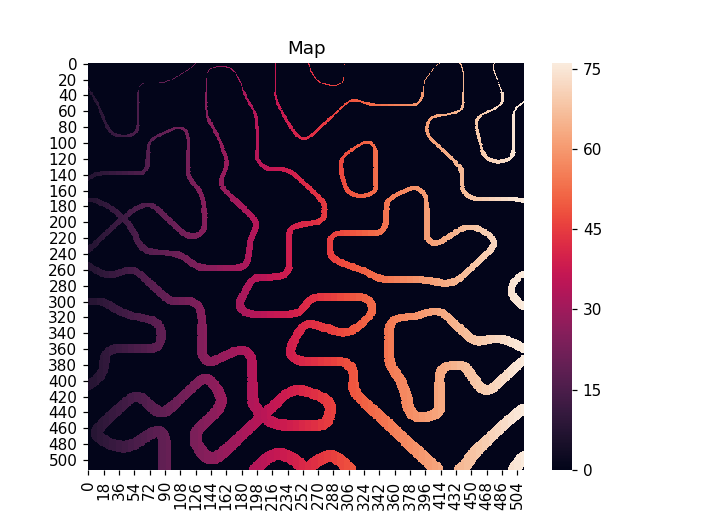

(158.26032214202118, 312.79797221303636)


<IPython.core.display.Javascript object>


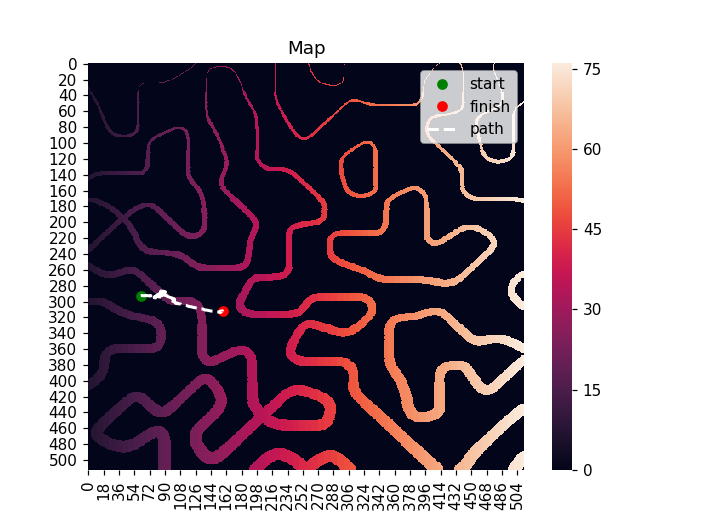

<IPython.core.display.Javascript object>


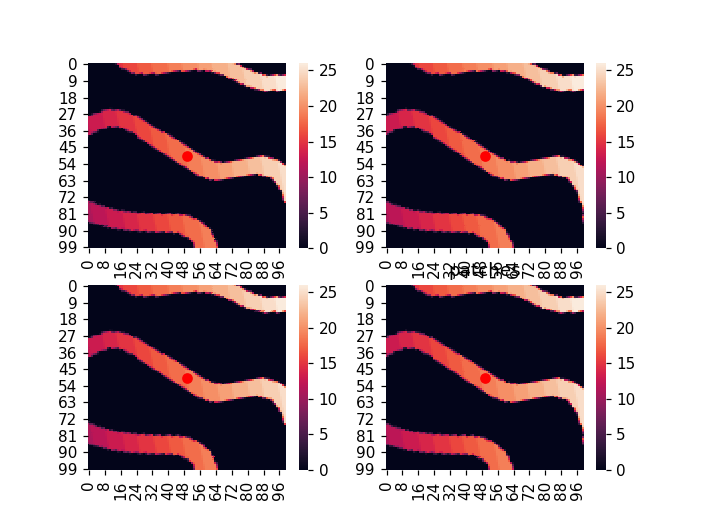

0.07450980392156863
0.07450980392156863
0.07450980392156863
0.07450980392156863


<IPython.core.display.Javascript object>


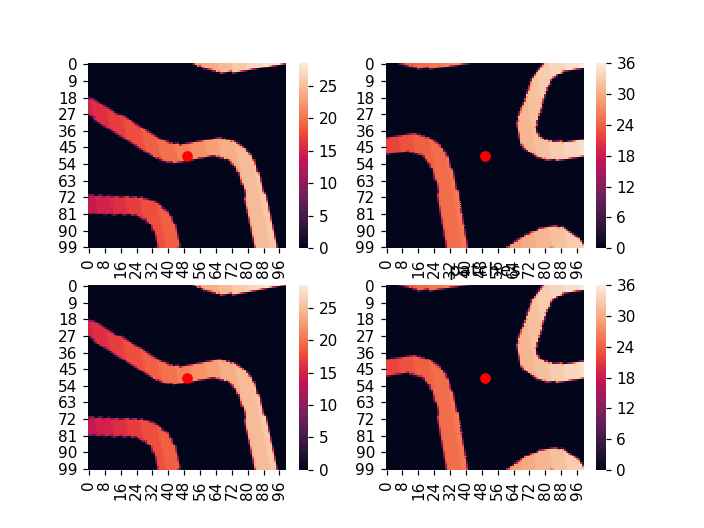

0.08235294117647059
0.0
0.08235294117647059
0.0


<IPython.core.display.Javascript object>


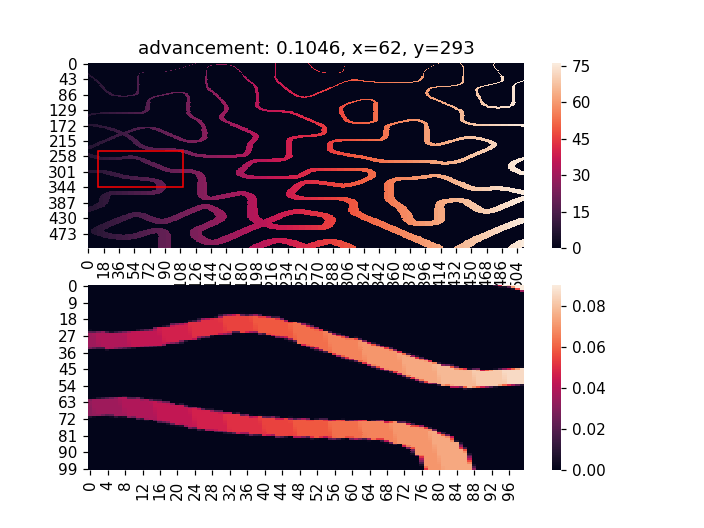

<IPython.core.display.Javascript object>


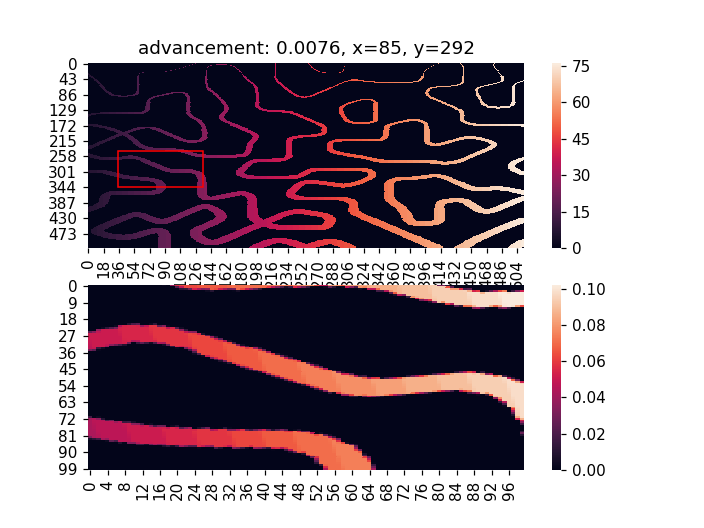

<IPython.core.display.Javascript object>


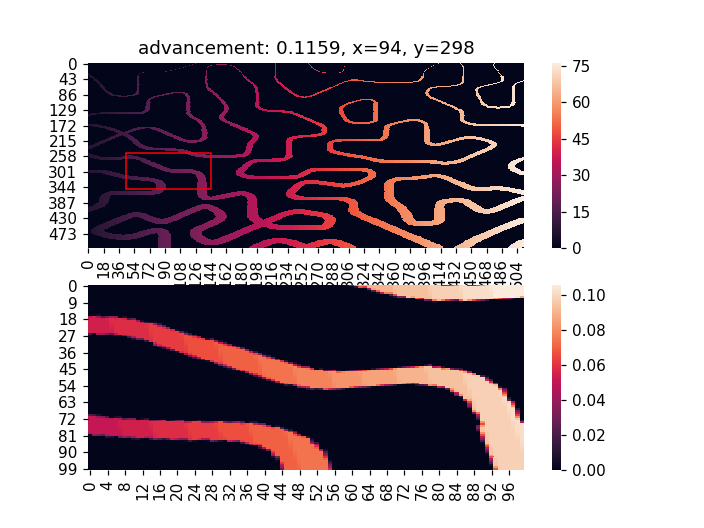

In [198]:
deb_pip = DebugPipeline(hm)

deb_pip(dfs[1])